In [1]:
# Topic 11: Hashing & Hash Tables 
# Task 1: Implementing a Simple Hash Table with Collision Handling 

In [2]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    def _hash(self, key):
        return hash(key) % self.size

    def insert_chaining(self, key, value):
        index = self._hash(key)
        if self.table[index] is None:
            self.table[index] = []
        for pair in self.table[index]:
            if pair[0] == key:
                pair[1] = value
                return
        self.table[index].append([key, value])

    def get_chaining(self, key):
        index = self._hash(key)
        if self.table[index] is not None:
            for pair in self.table[index]:
                if pair[0] == key:
                    return pair[1]
        return None

    def delete_chaining(self, key):
        index = self._hash(key)
        if self.table[index] is not None:
            for i, pair in enumerate(self.table[index]):
                if pair[0] == key:
                    del self.table[index][i]
                    return

    def insert_open_addressing(self, key, value):
        index = self._hash(key)
        original_index = index
        while self.table[index] is not None:
            if self.table[index][0] == key:
                self.table[index][1] = value
                return
            index = (index + 1) % self.size
            if index == original_index:
                raise Exception("HashTable is full")
        self.table[index] = [key, value]

    def get_open_addressing(self, key):
        index = self._hash(key)
        original_index = index
        while self.table[index] is not None:
            if self.table[index][0] == key:
                return self.table[index][1]
            index = (index + 1) % self.size
            if index == original_index:
                break
        return None

    def delete_open_addressing(self, key):
        index = self._hash(key)
        original_index = index
        while self.table[index] is not None:
            if self.table[index][0] == key:
                self.table[index] = None
                return
            index = (index + 1) % self.size
            if index == original_index:
                break

In [3]:
# Task 2: Implementing a Custom Hash Function and Analyzing Collisions 

Custom Hash Function Collisions: 990
Built-in Hash Function Collisions: 990


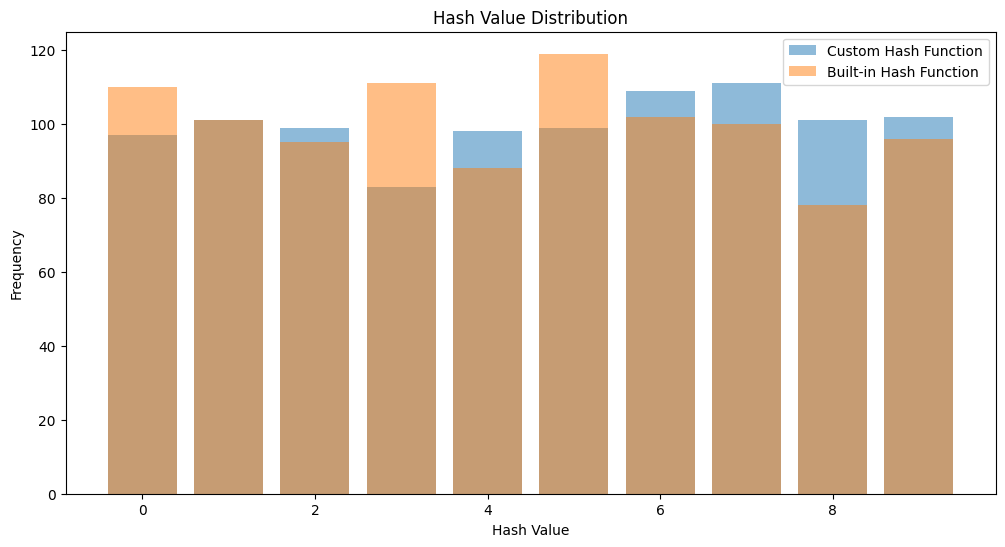

In [4]:
from collections import Counter
import random
import string

import matplotlib.pyplot as plt

# Custom hash function
def custom_hash(key):
    return sum(ord(c) for c in key) % 10

# Function to analyze collisions
def analyze_collisions(hash_function, keys, table_size):
    hash_table = [0] * table_size
    collisions = 0

    for key in keys:
        index = hash_function(key) % table_size
        if hash_table[index] > 0:
            collisions += 1
        hash_table[index] += 1

    return collisions, hash_table

# Generate a large dataset of random strings

def generate_random_strings(n, length=8):
    return [''.join(random.choices(string.ascii_letters, k=length)) for _ in range(n)]

# Dataset
dataset = generate_random_strings(1000)

# Analyze collisions for custom hash function
custom_collisions, custom_distribution = analyze_collisions(custom_hash, dataset, 10)

# Analyze collisions for Python's built-in hash function
builtin_collisions, builtin_distribution = analyze_collisions(hash, dataset, 10)

# Print collision results
print(f"Custom Hash Function Collisions: {custom_collisions}")
print(f"Built-in Hash Function Collisions: {builtin_collisions}")

# Plot histogram of hash values
plt.figure(figsize=(12, 6))
plt.bar(range(10), custom_distribution, alpha=0.5, label='Custom Hash Function')
plt.bar(range(10), builtin_distribution, alpha=0.5, label='Built-in Hash Function')
plt.xlabel('Hash Value')
plt.ylabel('Frequency')
plt.title('Hash Value Distribution')
plt.legend()
plt.show()

In [5]:
# Task 3: Implementing a Caching Mechanism using Hashing (LRU Cache) 

In [6]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.prev = None
        self.next = None

class LRUCache:
    def __init__(self, capacity):
        self.capacity = capacity
        self.cache = {}  # Hash table for quick lookups
        self.head = Node(0, 0)  # Dummy head of the doubly linked list
        self.tail = Node(0, 0)  # Dummy tail of the doubly linked list
        self.head.next = self.tail
        self.tail.prev = self.head

    def _remove(self, node):
        """Remove a node from the doubly linked list."""
        prev_node = node.prev
        next_node = node.next
        prev_node.next = next_node
        next_node.prev = prev_node

    def _add(self, node):
        """Add a node right after the head."""
        node.next = self.head.next
        node.prev = self.head
        self.head.next.prev = node
        self.head.next = node

    def get(self, key):
        if key in self.cache:
            node = self.cache[key]
            self._remove(node)
            self._add(node)  # Move the accessed node to the front
            return node.value
        return -1

    def put(self, key, value):
        if key in self.cache:
            self._remove(self.cache[key])
        node = Node(key, value)
        self.cache[key] = node
        self._add(node)
        if len(self.cache) > self.capacity:
            # Remove the least recently used node
            lru = self.tail.prev
            self._remove(lru)
            del self.cache[lru.key]

# Testing the LRUCache
cache = LRUCache(2)
cache.put(1, "A")
cache.put(2, "B")
print(cache.get(1))  # Output: "A"
cache.put(3, "C")  # Removes least recently used key (2)
print(cache.get(2))  # Output: -1 (not found)
print(cache.get(3))  # Output: "C"

A
-1
C
